`Import Libraries`
    * NumPy, Pandas, Matplotlib, Seaborn

`Import Data`
    * fox, nyt, tel

`Data Exploration`
    * Shape, NaN values, Removing "url's" columns, etc
    * Concantenating all DataFrames
    
`Data Pre-processing`
    * NLTK Library - Removing special characters, stop works, etc
    * Split data into X and y
    
`Modelling`
    * KMeans

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA

#### Import News Data

In [4]:
fox = pd.read_csv("../Data/fox_article.csv")
nyt = pd.read_csv("../Data/nyt_article.csv")
tel = pd.read_csv("../Data/tel_article.csv")

#### Data Exploration

In [5]:
fox.head()

,Title,Article,Section,Article_URL
0,"Biden's $2T spending plan, billed as infrastru...","$2 trillion plan, which is being promoted l...",Politics,https://www.foxnews.com//politics/biden-spendi...
1,Ingraham: Corporations who speak out against G...,Democrats and big corporations like Delta Airl...,Politics,https://www.foxnews.com//media/laura-ingraham-...
2,Girl Scout breaks cookie-selling record with m...,"An 8-year-old from San Bernardino, California ...",Politics,https://www.foxnews.com//food-drink/girl-scout...
3,"Andrew Yang hospitalized, NYC campaign events ...",mayoral candidate was hospitalized Friday a...,Politics,https://www.foxnews.com//politics/andrew-yang-...
4,Former Trump aide Max Miller raised 500K in on...,"Max Miller, the former aide mounting a prim...",Politics,https://www.foxnews.com//politics/former-trump...


In [6]:
fox.isna().sum()

Title          0
Article        0
Section        0
Article_URL    0
dtype: int64

In [7]:
fox.shape

(92, 4)

In [8]:
fox.Section.unique()

array(['Politics', 'Sports', 'Lifestyle'], dtype=object)

In [9]:
nyt.head()

,Title,Article,Section,Article_URL
0,NaN,Pilgrims have been coming to Switzerland’s . ...,Travel,https://www.nytimes.com/2021/03/25/travel/roge...
1,NaN,"Life can change in an instant, as I experience...",Travel,https://www.nytimes.com/2021/03/29/travel/indi...
2,NaN,"For six days, Paul Theroux, the famous America...",Travel,https://www.nytimes.com/2021/03/28/books/paul-...
3,NaN,"The expected highlights of opening day, which ...",Sports,https://www.nytimes.com/2021/04/01/sports/base...
4,NaN,Over the course of the decade since I first vi...,Travel,https://www.nytimes.com/2021/03/30/travel/new-...


In [10]:
nyt.isna().sum()

Title          22
Article         2
Section         0
Article_URL     0
dtype: int64

In [11]:
nyt.shape

(57, 4)

In [12]:
nyt.Section.unique()

array(['Travel', 'Sports', 'Business', 'Politics'], dtype=object)

In [13]:
tel.head()

,Title,Article,Section,Article_URL
0,\nBritish taxpayers funded EU factory at heart...,British taxpayers have invested millions of po...,politics,https://www.telegraph.co.uk/news/2021/04/01/br...
1,\nWhy Ursula von der Leyen won't quit over Ast...,Ursula von der Leyen has no plans to quit afte...,politics,https://www.telegraph.co.uk/news/2021/02/02/ur...
2,\nOwen Paterson on the agony of his wife's sui...,When the police told Owen Paterson his wife Ro...,politics,https://www.telegraph.co.uk/news/2021/01/29/ow...
3,\nA year of coronavirus lockdown: How Boris Jo...,"Ever since his last year, debate has raged a...",politics,https://www.telegraph.co.uk/politics/2021/03/1...
4,\nEU's 'most embarrassing' day: How the AstraZ...,It was an extraordinary story – the European C...,politics,https://www.telegraph.co.uk/news/2021/03/24/eu...


In [14]:
tel.Section.unique()

array(['politics', 'sport', 'business', 'culture'], dtype=object)

In [15]:
tel.Section = tel.Section.str.capitalize()
tel.Section

0      Politics
1      Politics
2      Politics
3      Politics
4      Politics
         ...   
191    Politics
192    Politics
193    Politics
194    Politics
195    Politics
Name: Section, Length: 196, dtype: object

In [16]:
tel.Section.unique()

array(['Politics', 'Sport', 'Business', 'Culture'], dtype=object)

In [17]:
tel.Section.shape

(196,)

In [18]:
# Strip Empty spaces from all Titles in DataFrame
tel.Title = tel['Title'].str.strip()
nyt.Title = nyt['Title'].str.strip()
fox.Title = fox['Title'].str.strip()

In [19]:
tel.isna().sum()

Title          41
Article         6
Section         0
Article_URL     0
dtype: int64

In [38]:
# Concantenate all DataFrames into one
data = pd.concat([pd.concat([tel, nyt]), fox])

In [59]:
pd.read_csv("url_data.csv")['Section'].unique()

array(['Politics', 'Sport', 'Business', 'Culture', 'Travel', 'Sports',
       'Lifestyle'], dtype=object)

In [39]:
data.head()

,Title,Article,Section,Article_URL
0,British taxpayers funded EU factory at heart o...,British taxpayers have invested millions of po...,Politics,https://www.telegraph.co.uk/news/2021/04/01/br...
1,Why Ursula von der Leyen won't quit over Astra...,Ursula von der Leyen has no plans to quit afte...,Politics,https://www.telegraph.co.uk/news/2021/02/02/ur...
2,Owen Paterson on the agony of his wife's suici...,When the police told Owen Paterson his wife Ro...,Politics,https://www.telegraph.co.uk/news/2021/01/29/ow...
3,A year of coronavirus lockdown: How Boris John...,"Ever since his last year, debate has raged a...",Politics,https://www.telegraph.co.uk/politics/2021/03/1...
4,EU's 'most embarrassing' day: How the AstraZen...,It was an extraordinary story – the European C...,Politics,https://www.telegraph.co.uk/news/2021/03/24/eu...


#### Data Pre-processing

In [22]:
import re
import string
import nltk
from html.parser import HTMLParser
from nltk.corpus import stopwords

In [23]:
# Function turning a list into a string
def listToString(s): 
    str1 = " "   
    return (str1.join(s))

# Function to clean texts
def clean_texts(text):
  # Removing html characters
  text = HTMLParser().unescape(text)
  # Removing urls and hashtags
  text = re.sub(r'https?:\/\/.\S+', "", text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'^RT[\s]+', '', text)
  # Contradiction replacement
  dictionary={"'s":" is","n't":" not","'m":" am","'ll":" will",
           "'d":" would","'ve":" have","'re":" are", "\n":" "}
  for key,value in dictionary.items():
      if key in text:
          text = text.replace(key, value)
  # Convert to lower case
  text = text.lower()
  # Removing stopwords
  nltk.download('stopwords')
  stopwords_eng = stopwords.words('english') 
  text_tokens = text.split()
  text_list=[]
  for word in text_tokens:
      if word not in stopwords_eng:
          text_list.append(word)
  # Remove punctuations
  clean_text = []
  for word in text_list:
      if word not in string.punctuation:
          clean_text.append(word)

  # Turning the list of words into a single string
  clean_text = listToString(clean_text)
  return clean_text

In [24]:
clean_texts[data['Article'].iloc[0,]]

TypeError: 'function' object is not subscriptable

In [ ]:
# Cleaning all the article texts
for i, article in enumerate(data.Article):
    try:
        data.Article.iloc[i] = clean_texts(data['Article'].iloc[i])
    except:
        pass

In [ ]:
# Cleaning all the titlesv
for i, title in enumerate(data.Title):
    try:
        data.Title.iloc[i] = clean_texts(data['Title'].iloc[i])
    except:
        pass

In [ ]:
data.head()

In [ ]:
data.dropna(inplace=True)

In [25]:
y = data.Section.values # Target
X = data.drop('Section', axis=1) # Features

In [26]:
le = LabelEncoder()

le.fit(y)
y = le.transform(y)

In [27]:
y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6,
       6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5,
       5, 5, 5, 3, 5, 5, 5, 6, 5, 6, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 5, 3, 5, 3, 5, 5, 5, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2,

In [29]:
le.inverse_transform(y)

array(['Politics', 'Politics', 'Politics', 'Politics', 'Politics',
       'Politics', 'Politics', 'Politics', 'Politics', 'Politics',
       'Politics', 'Politics', 'Politics', 'Politics', 'Politics',
       'Politics', 'Sport', 'Sport', 'Politics', 'Sport', 'Sport',
       'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport',
       'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport',
       'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Business',
       'Sport', 'Sport', 'Sport', 'Sport', 'Business', 'Business',
       'Sport', 'Business', 'Business', 'Business', 'Business', 'Sport',
       'Business', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport',
       'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport',
       'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport', 'Sport',
       'Business', 'Business', 'Sport', 'Business', 'Business', 'Sport',
       'Business', 'Business', 'Business', 'Business', 'Business',
       'Business', 'Busine

In [115]:
X.Article

0     british taxpayers invested millions pounds dut...
1     ursula von der leyen plans quit last week’s co...
2     police told owen paterson wife rose found shro...
3     ever since last year, debate raged extent expe...
4     extraordinary story – european commission find...
                            ...                        
87    race-based universal basic income payments sta...
88    administration announced friday would begin in...
89    photo, exclusively obtained fox news, shows --...
90    pair interview clips released friday, claimed ...
91    new polling data shows almost three four ameri...
Name: Article, Length: 281, dtype: object

In [133]:
tokenizer = Tokenizer(num_words=100)

tokenizer.fit_on_texts(X.Article)
enc_article = tokenizer.texts_to_sequences(X.Article)

In [134]:
max_length = 10
padded_data = pad_sequences(enc_article, maxlen=max_length, padding='post')

In [154]:
model = PCA(2)
X_reduced = model.fit_transform(padded_data)

#### KMeans Model

In [174]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

In [175]:
k_means = KMeans(n_clusters=7, random_state=42)
preds = k_means.fit_predict(np.array(X_reduced))

In [170]:
preds

array([0, 1, 0, 0, 3, 0, 1, 3, 3, 1, 3, 0, 1, 1, 3, 0, 1, 3, 0, 2, 3, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 3, 3, 1, 2, 2, 3, 3, 3, 0, 3, 2, 0, 1, 3,
       2, 1, 2, 2, 3, 0, 1, 2, 3, 1, 1, 0, 0, 1, 1, 1, 3, 1, 3, 2, 0, 1,
       2, 0, 0, 2, 3, 3, 1, 0, 1, 0, 1, 2, 0, 0, 3, 3, 1, 2, 0, 0, 3, 2,
       3, 3, 2, 0, 3, 0, 1, 1, 0, 3, 0, 0, 1, 0, 0, 2, 0, 3, 1, 3, 1, 0,
       2, 2, 0, 2, 1, 3, 0, 1, 0, 2, 0, 2, 0, 1, 3, 0, 1, 0, 3, 2, 3, 1,
       0, 1, 1, 0, 3, 0, 0, 3, 2, 3, 3, 1, 0, 3, 2, 0, 0, 0, 1, 0, 2, 2,
       0, 0, 3, 3, 1, 3, 3, 3, 3, 0, 0, 3, 2, 1, 2, 1, 0, 0, 0, 0, 2, 2,
       3, 2, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 3, 2, 1, 1, 1, 3, 1, 1, 2, 3,
       1, 0, 1, 2, 3, 0, 3, 0, 1, 2, 1, 0, 1, 0, 2, 0, 1, 3, 1, 0, 0, 3,
       0, 1, 3, 2, 3, 0, 0, 3, 2, 0, 2, 3, 2, 3, 3, 0, 3, 3, 3, 3, 1, 2,
       1, 2, 1, 0, 0, 1, 1, 2, 0, 3, 0, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 3,
       2, 1, 1, 3, 0, 1, 2, 3, 2, 0, 1, 3, 0, 2, 1, 1, 1], dtype=int32)

/Users/turikumwe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


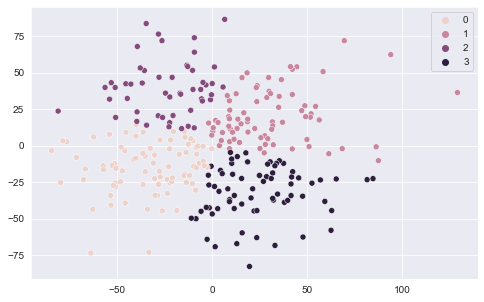

In [173]:
fig = plt.figure(figsize=(8, 5))
ax = sns.scatterplot(X_reduced[:, 0], X_reduced[:, 1], hue=preds)

In [184]:
print("Model's Adj Rand Score: {}".format(adjusted_rand_score(preds, y[:281])))

Model's Adj Rand Score: 0.0008231900325318509


In [185]:
import pickle

In [187]:
# Save Model
filename = "kmeans_model.sav"
pickle.dump(k_means, open(filename, 'wb'))

In [188]:
# Save Tokernizer
filename = "tokenizer.pickle"
pickle.dump(tokenizer, open(filename, 'wb'))

In [191]:
pd.DataFrame(X_reduced).to_csv('cluster_file.csv')

In [57]:
data.to_csv('url_data.csv')